# Credit Card Fraud Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### URL
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from numpy import mean

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='V1', ylabel='V2'>

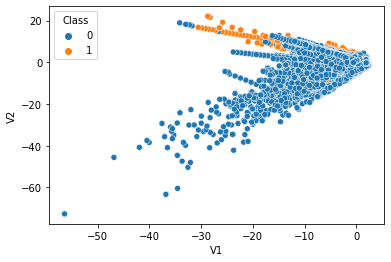

In [5]:
sns.scatterplot(data = df, x ='V1', y = 'V2', hue = 'Class')

<AxesSubplot:xlabel='Class', ylabel='count'>

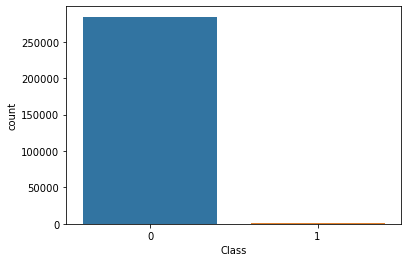

In [6]:
sns.countplot("Class", data=df)

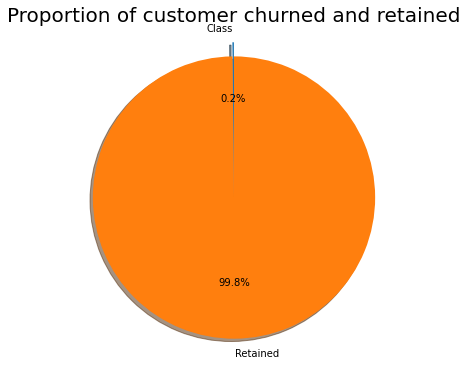

In [7]:
labels = 'Class', 'Retained'
sizes = [len(df.loc[df['Class']==1]), len(df.loc[df['Class']==0])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

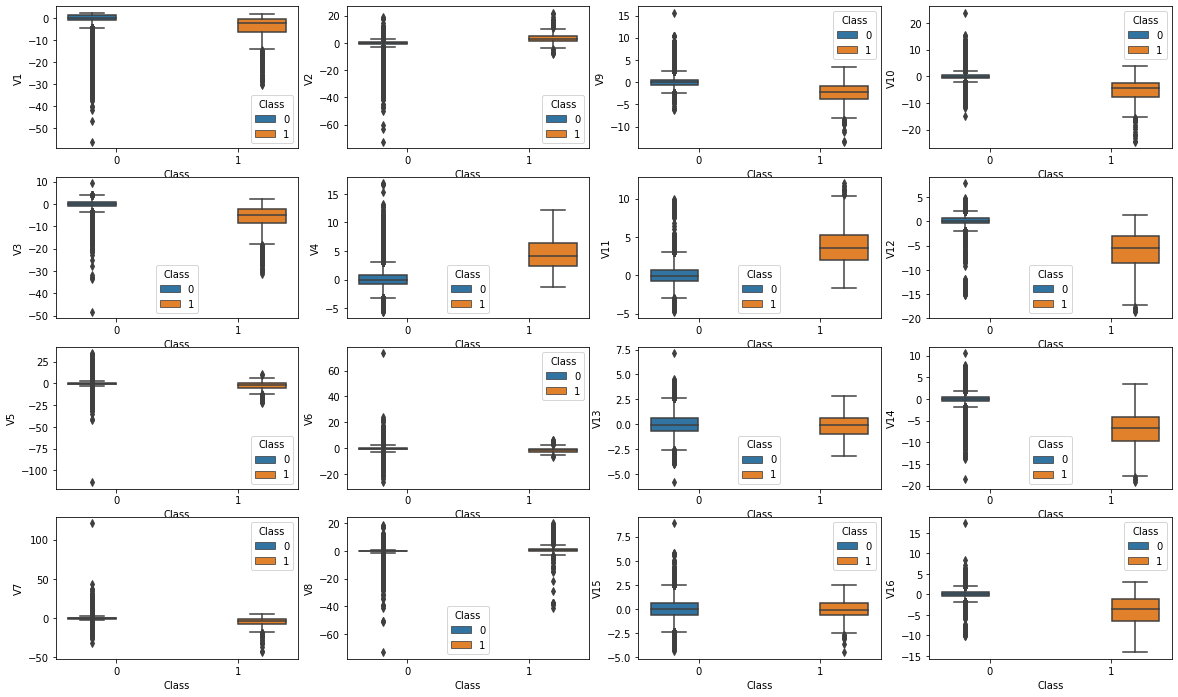

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(20, 12))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(y='V1',x = 'Class', hue = 'Class',data = df, ax=ax[0][0])
sns.boxplot(y='V2',x = 'Class', hue = 'Class',data = df , ax=ax[0][1])
sns.boxplot(y='V3',x = 'Class', hue = 'Class',data = df, ax=ax[1][0])
sns.boxplot(y='V4',x = 'Class', hue = 'Class',data = df, ax=ax[1][1])
sns.boxplot(y='V5',x = 'Class', hue = 'Class',data = df, ax=ax[2][0])
sns.boxplot(y='V6',x = 'Class', hue = 'Class',data = df , ax=ax[2][1])
sns.boxplot(y='V7',x = 'Class', hue = 'Class',data = df, ax=ax[3][0])
sns.boxplot(y='V8',x = 'Class', hue = 'Class',data = df, ax=ax[3][1])
sns.boxplot(y='V9',x = 'Class', hue = 'Class',data = df, ax=ax[0][2])
sns.boxplot(y='V10',x = 'Class', hue = 'Class',data = df , ax=ax[0][3])
sns.boxplot(y='V11',x = 'Class', hue = 'Class',data = df, ax=ax[1][2])
sns.boxplot(y='V12',x = 'Class', hue = 'Class',data = df, ax=ax[1][3])
sns.boxplot(y='V13',x = 'Class', hue = 'Class',data = df, ax=ax[2][2])
sns.boxplot(y='V14',x = 'Class', hue = 'Class',data = df, ax=ax[2][3])
sns.boxplot(y='V15',x = 'Class', hue = 'Class',data = df, ax=ax[3][2])
sns.boxplot(y='V16',x = 'Class', hue = 'Class',data = df , ax=ax[3][3])
plt.show()

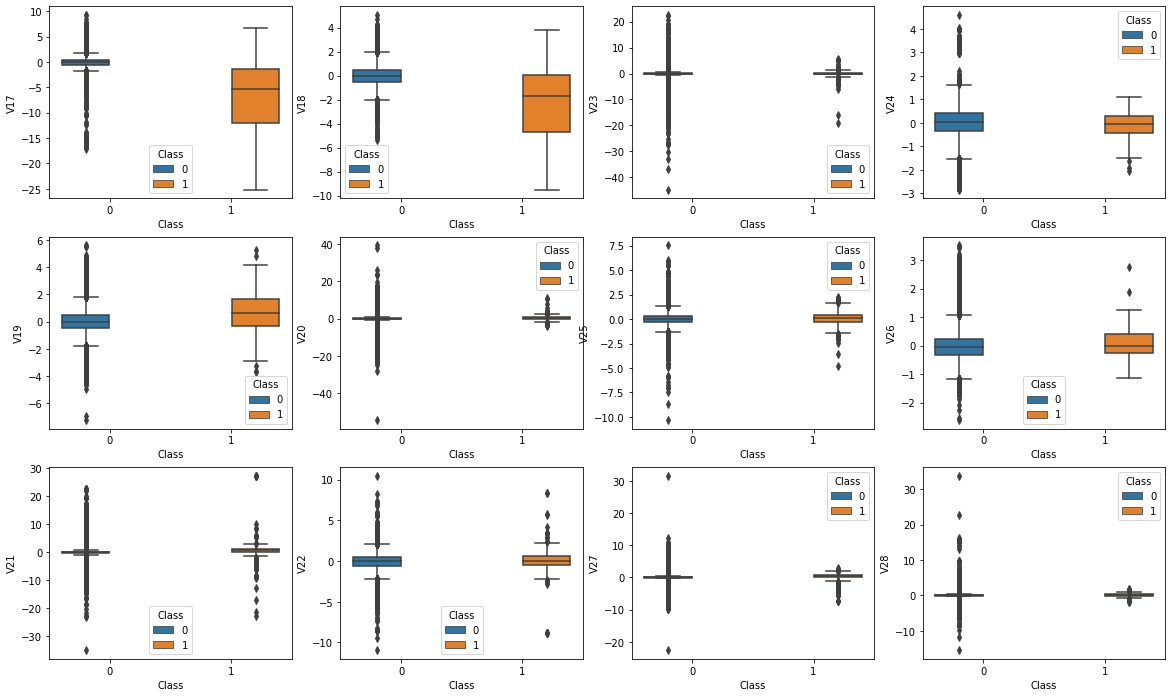

In [9]:
fig, ax = plt.subplots(3, 4, figsize=(20, 12))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(y='V17',x = 'Class', hue = 'Class',data = df, ax=ax[0][0])
sns.boxplot(y='V18',x = 'Class', hue = 'Class',data = df, ax=ax[0][1])
sns.boxplot(y='V19',x = 'Class', hue = 'Class',data = df, ax=ax[1][0])
sns.boxplot(y='V20',x = 'Class', hue = 'Class',data = df, ax=ax[1][1])
sns.boxplot(y='V21',x = 'Class', hue = 'Class',data = df, ax=ax[2][0])
sns.boxplot(y='V22',x = 'Class', hue = 'Class',data = df , ax=ax[2][1])
sns.boxplot(y='V23',x = 'Class', hue = 'Class',data = df, ax=ax[0][2])
sns.boxplot(y='V24',x = 'Class', hue = 'Class',data = df, ax=ax[0][3])
sns.boxplot(y='V25',x = 'Class', hue = 'Class',data = df, ax=ax[1][2])
sns.boxplot(y='V26',x = 'Class', hue = 'Class',data = df, ax=ax[1][3])
sns.boxplot(y='V27',x = 'Class', hue = 'Class',data = df, ax=ax[2][2])
sns.boxplot(y='V28',x = 'Class', hue = 'Class',data = df, ax=ax[2][3])
plt.show()

In [10]:
df.corr()['Class'].sort_values()[::-1]

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('accuracy : {0:.2f}, precision : {1:.2f}, recall : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

### NoPreprocessing

In [14]:
print("Before Undersampling", Counter(y_train))

Before Undersampling Counter({0: 199041, 1: 323})


#### NoPreprocessing_LogisticRegression

In [16]:
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

accuracy : 1.00, precision : 0.77, recall : 0.67
f1-score : 0.72, auc : 0.83


C:\Users\Fishe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### NoPreprocessing_LGBMClassifier

In [17]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

accuracy : 1.00, precision : 0.97, recall : 0.79
f1-score : 0.87, auc : 0.90


#### NoPreprocessing_RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
modeling(randomfc,X_train,X_test,y_train,y_test)

accuracy : 1.00, precision : 0.96, recall : 0.73
f1-score : 0.83, auc : 0.86


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf = model.fit(X_train, y_train)
pred = clf.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred))

ROC AUC score for undersampled data:  0.5


### undersampling

In [20]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [21]:
print("After Undersampling", Counter(y_train_under))

After Undersampling Counter({0: 323, 1: 323})


#### Undersampling_LogisticRegression

In [22]:
lr = LogisticRegression()
modeling(lr,X_train_under,X_test,y_train_under,y_test)

accuracy : 0.95, precision : 0.03, recall : 0.93
f1-score : 0.07, auc : 0.94


#### Undersampling_LGBMClassifier

In [23]:
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train_under,X_test,y_train_under,y_test)

accuracy : 0.96, precision : 0.04, recall : 0.91
f1-score : 0.08, auc : 0.93


#### Undersampling_RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
modeling(randomfc,X_train_under,X_test,y_train_under,y_test)

accuracy : 0.95, precision : 0.04, recall : 0.91
f1-score : 0.07, auc : 0.93


#### Undersampling_Support Vector Machine

In [25]:
model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

ROC AUC score for undersampled data:  0.5654978459273573


### SMOTE

In [26]:
SMOTE = SMOTE()

In [27]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [28]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 199041, 1: 199041})


#### SMOTE_LogisticRegression

In [29]:
lr = LogisticRegression()
modeling(lr,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

accuracy : 0.98, precision : 0.08, recall : 0.89
f1-score : 0.15, auc : 0.94


C:\Users\Fishe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### SMOTE_LGBMClassifier

In [30]:
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

accuracy : 1.00, precision : 0.90, recall : 0.83
f1-score : 0.87, auc : 0.92


#### SMOTE_RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
modeling(randomfc,X_train_under,X_test,y_train_under,y_test)

accuracy : 0.96, precision : 0.04, recall : 0.89
f1-score : 0.08, auc : 0.92


#### SMOTE_Support Vector Machine

In [ ]:
model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_SMOTE))